# Sistem Rekomendasi

Cara kerja sistem rekomendasi ini adalah merekomendasikan barang barang lain berdasarkan disrkipsi produk yang ada, jadi ibaratkan kita berbelanja di toko atamstore, kemudian mencari dengan kata kunci **'water'** maka benda benda lain yang berhubungan dengan **'water'** akan muncul berdasarkan _clustering_

## _Import Library_

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import pandas as pd
import matplotlib.pyplot as plt

## Persiapan Data

### Menampilkan Data

In [21]:
amazon_desc = pd.read_csv('C:/Users/Atam Rifai S/OneDrive - ITPLN/OneDrive - Komputer/Script/Machine Learning/Dicoding/Rekomendasi sistem/product_descriptions.csv')
amazon_desc

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...
...,...,...
124423,224424,Create a neat yet stylish storage space for or...
124424,224425,Our Bullnose Adirondack Chair Cushions fit Adi...
124425,224426,Joist hangers are designed to provide support ...
124426,224427,These socket cap screws are ideal for applicat...


### Memahami Isi Data

In [22]:
amazon_desc.describe()

,product_uid
count,124428.000000
mean,162214.500000
std,35919.413985
min,100001.000000
25%,131107.750000
50%,162214.500000
75%,193321.250000
max,224428.000000


### Membersihkan Data

In [24]:
amazon_desc = product_descriptions.dropna()
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [5]:
product_descriptions1 = product_descriptions.head(2000)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(50)

0     Not only do angles make joints stronger, they ...
1     BEHR Premium Textured DECKOVER is an innovativ...
2     Classic architecture meets contemporary design...
3     The Grape Solar 265-Watt Polycrystalline PV So...
4     Update your bathroom with the Delta Vero Singl...
5     Achieving delicious results is almost effortle...
6     The Quantum Adjustable 2-Light LED Black Emerg...
7     The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8     Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9     Valley View Industries Metal Stakes (4-Pack) a...
10    Recycler 22 in. Personal Pace Variable Speed S...
11    The 96 in. wide Caramel Simple Weave Rollup Ba...
12    The InSinkErator SinkTop Switch Single Outlet ...
13    The Rubbermaid 1-Step Folding Plastic Step Sto...
14    Backyard X-Scapes, Inc. uses the finest bamboo...
15    Make grilling great with this handsome and fun...
16    The MD Building Products 36 in. x 36 in. x 1/5...
17    This classic plastic sprinkler head that f

## Menyusun Algoritma Sistem Rekomendasi

### Mengubah Kata Menjadi Vector Berdasarkan Kata Kunci

In [6]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<2000x20681 sparse matrix of type '<class 'numpy.float64'>'
	with 141753 stored elements in Compressed Sparse Row format>

### Membuat Klustering Pada Setiap Kata Kunci

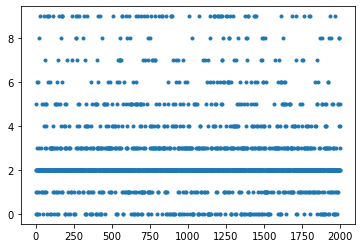

In [7]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [8]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [9]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 door
 doors
 glass
 steel
 security
 energy
 garage
 pet
 frame
 hinges
Cluster 1:
 wood
 california
 proposition
 65
 nbsp
 residents
 insulation
 paint
 ft
 concrete
Cluster 2:
 air
 heat
 cooling
 000
 fan
 control
 btu
 room
 unit
 cool
Cluster 3:
 water
 heater
 toilet
 tank
 bowl
 flush
 hot
 gal
 valve
 easy
Cluster 4:
 ft
 use
 easy
 design
 used
 water
 resistant
 steel
 construction
 aluminum
Cluster 5:
 light
 watt
 led
 bulb
 fixture
 lighting
 bulbs
 fan
 ceiling
 glass
Cluster 6:
 tile
 rug
 ceramic
 flooring
 installation
 floor
 indoor
 residential
 recommended
 orders
Cluster 7:
 cooking
 cu
 cycle
 wash
 oven
 clothes
 dryer
 washer
 cycles
 options
Cluster 8:
 power
 volt
 speed
 battery
 tool
 engine
 protection
 lithium
 blade
 plan
Cluster 9:
 storage
 steel
 shelves
 shelf
 finish
 lbs
 cabinet
 metal
 frame
 adjustable


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Membuat Fungsi Untuk Menjalankan Prediksi

In [10]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

## Menjalankan Prediksi

In [14]:
show_recommendations("water")

Cluster 3:
 water
 heater
 toilet
 tank
 bowl
 flush
 hot
 gal
 valve
 easy


In [19]:
show_recommendations("paint")

Cluster 1:
 wood
 california
 proposition
 65
 nbsp
 residents
 insulation
 paint
 ft
 concrete


## Kesimpulan

Sistem rekomendasi dapat berjalan **dengan baik** dengan mengklasifikasi dan _cluster_ dari setiap kata kunci menggunakan algoritma **K-Means**. Dengan begini, ketika kita ingin mencari satu kata kunci maka sistem akan memberikan rekomendasi kata kunci lain. _Ini berguna pada sistem e-commerce, supaya pembeli terus melakukan pembelian_